# EDA

In this notebook I'll do some Exploratory Data Analysis, trying to get some insights on the data. There are a lot of files to explore, so let's get into it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import sys
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,8)
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
os.getcwd()

'/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/notebooks'

In [3]:
DATA_PATH = '/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/data/'

In [4]:
files = glob.glob(DATA_PATH + "/*.csv")

dfs = []
for filename in files:
    file = filename.split('/')[-1]#.split('.')[0]
    print(file)

bureau.csv
installments_payments.csv
previous_application.csv
POS_CASH_balance.csv
bureau_balance.csv
application_train.csv
sample_submission.csv
credit_card_balance.csv
application_test.csv
HomeCredit_columns_description.csv


Here we can see all the files that we have on hand. Let's first analyze the application_train.csv

# Application_train

Let's first drop some missing value columns and then separate numerical from categorical data. For this, I'm going to use the functions I've created on the Fail Fast notebook.

In [5]:
df_application_train = pd.read_csv(DATA_PATH + 'application_train.csv')

In [6]:
sys.path.append('/home/hugo/Documents/DataScience/Kaggle/kaggle_credit_risk/code/')

from utils import *

In [7]:
print('Shape of dataframe: {}'.format(df_application_train.shape))
df_application_train.head()

Shape of dataframe: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_application_train, _ = drop_missings_columns(df_application_train, treshold = 0.8)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


# Separating datatypes


In [9]:
at_object = df_application_train.select_dtypes(include='object')
at_numerical = df_application_train.select_dtypes(exclude='object')

print('Object df shape: ' + str(at_object.shape))
print('Numerical df shape: ' + str(at_numerical.shape))

Object df shape: (307511, 16)
Numerical df shape: (307511, 106)


# Let's make some plots

First, let me print out all the columns names in order to investigate them

In [10]:
list(at_numerical.columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

Now I'm going to make some plots to get familiar with the variables

### The Target

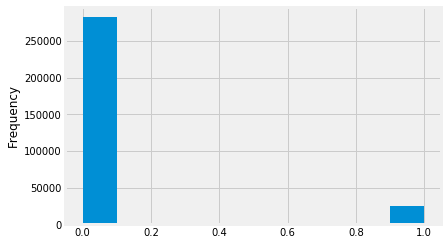

In [11]:
at_numerical['TARGET'].plot.hist(bins=10)
plt.show()

We can see that the ratio of 0's to 's is 10/1. So we have to deal carefully with this problem, as an imbalanced learning problem.

### CNT_CHILDREN

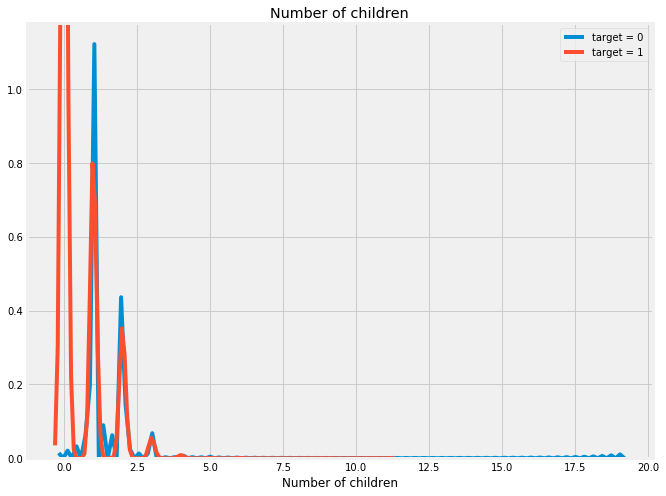

In [12]:
plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical['CNT_CHILDREN'][at_numerical['TARGET'] == 0], label = 'target = 0')
sns.kdeplot(at_numerical['CNT_CHILDREN'][at_numerical['TARGET'] == 1], label = 'target = 1')
plt.xlabel('Number of children')

plt.title('Number of children')
plt.show()

 So we can see that there is a concentration up to 5 children. But there is no correlation between our label and this feature directly observed from this plot. Let's continue.

### AMT_INCOME_TOTAL

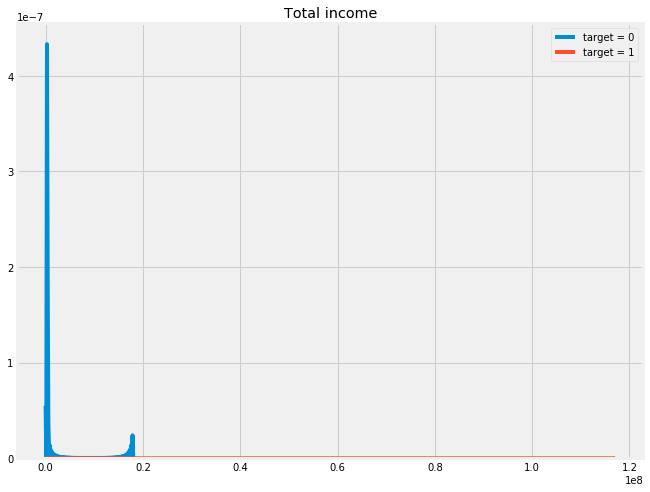

In [13]:
plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 0], label = 'target = 0')
sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 1], label = 'target = 1')

plt.title('Total income')
plt.show()

let's try to plot them separately

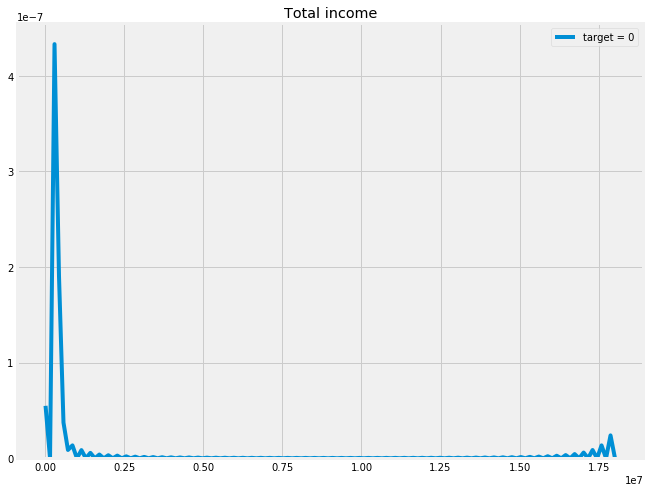

In [14]:
plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 0], label = 'target = 0')
#sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 1], label = 'target = 1')

plt.title('Total income')
plt.show()

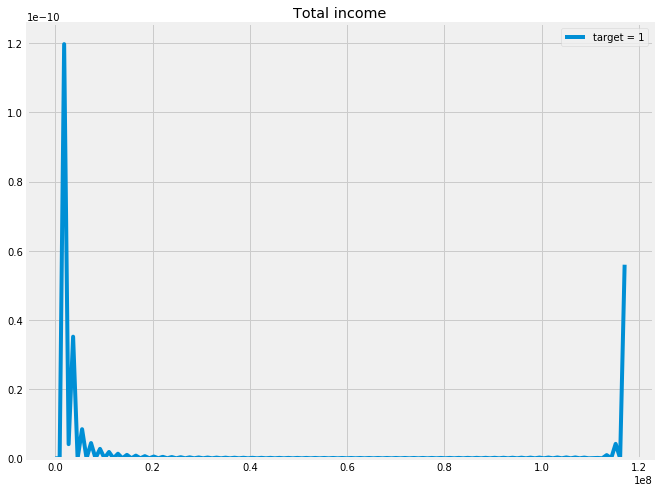

In [15]:
plt.figure(figsize=(10,8))

#sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 0], label = 'target = 0')
sns.kdeplot(at_numerical['AMT_INCOME_TOTAL'][at_numerical['TARGET'] == 1], label = 'target = 1')

plt.title('Total income')
plt.show()

Nothing weird so far, moving on.

### AMT_CREDIT

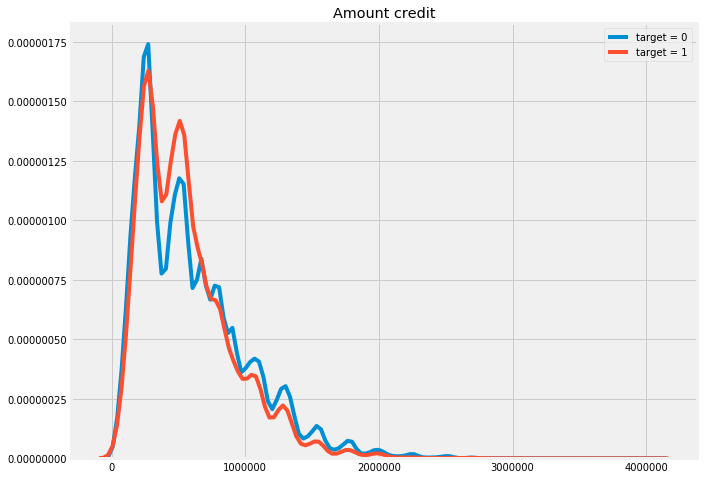

In [16]:
plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical['AMT_CREDIT'][at_numerical['TARGET'] == 0], label = 'target = 0')
sns.kdeplot(at_numerical['AMT_CREDIT'][at_numerical['TARGET'] == 1], label = 'target = 1')

plt.title('Amount credit')
plt.show()

Nothing to do here.

### AMT_ANNUITY

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


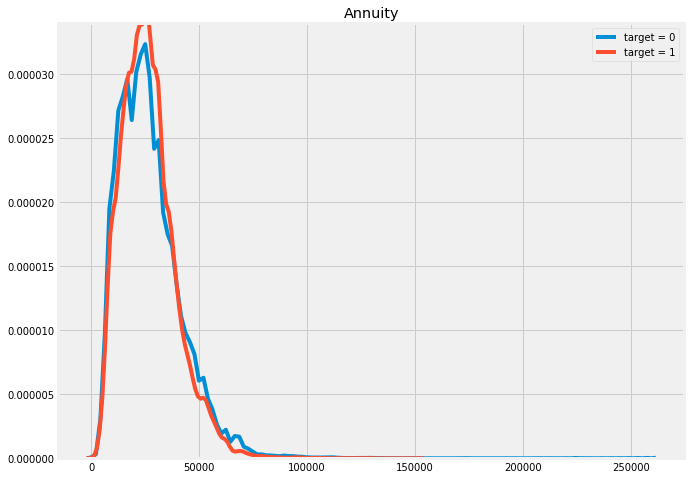

In [17]:
plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical['AMT_ANNUITY'][at_numerical['TARGET'] == 0], label = 'target = 0')
sns.kdeplot(at_numerical['AMT_ANNUITY'][at_numerical['TARGET'] == 1], label = 'target = 1')

plt.title('Annuity')
plt.show()

Humm, it seems like those numerical features are not bringing too much information in order to discriminate our target variable. Let's take a look into the correlation matrix and into our metadata (lists of variable discriptions). This way, we can try to utilize some domain knowledge in order to study which variables means what, and therefore create some good features for the models.

# Correlations

In [18]:
correlations = at_numerical.corr()['TARGET'].sort_values(ascending=False)

print('Most positive correlated variables:\n {}'.format(correlations.head(15)))
print('\nMost negative correlated variables:\n {}'.format(correlations.tail(15)))

Most positive correlated variables:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

Most negative correlated variables:
 LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE        

Now we are talking! There are some pretty correlated variables. Let's explore them!

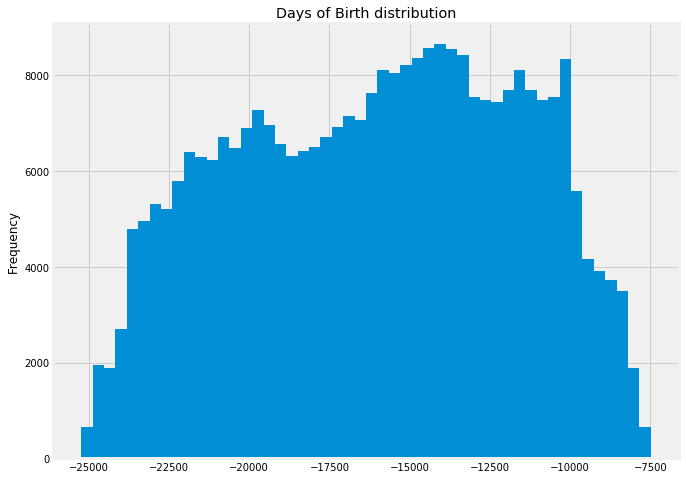

In [19]:
plt.figure(figsize=(10,8))
at_numerical['DAYS_BIRTH'].plot.hist(bins=50)
plt.title('Days of Birth distribution')
plt.show()

Now let's plot the kernel density distribution of this variable using target as a reference. But first, I'm going to normalize with absolutes, since there are only negative values in this plot.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


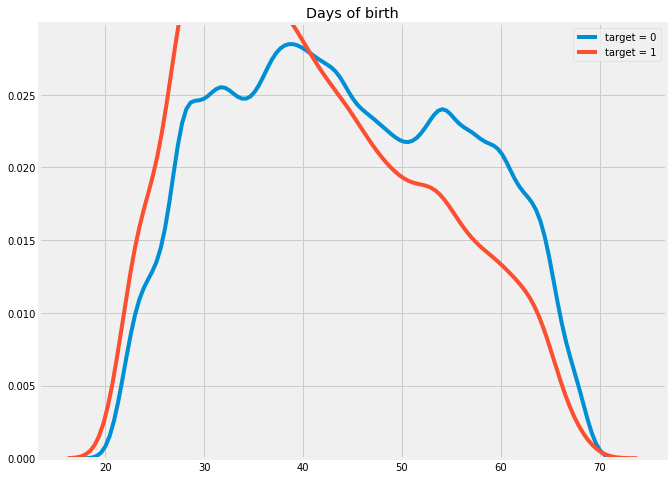

In [20]:
at_numerical['DAYS_BIRTH'] = abs(at_numerical['DAYS_BIRTH'])

plt.figure(figsize=(10,8))

sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target = 0')
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target = 1')

plt.title('Days of birth')
plt.show()

So now we can see some differences in the distributions. When the target is equals to one (client not getting credit), we can see that there is some negative slope for older clients. On the other hand, for younger clients, there is a peak in the target = 1 curve. Let's explore further! I'm going to create some bins to this variable and plot it against the target.

In [21]:
days_data = at_numerical[['TARGET', 'DAYS_BIRTH']]
days_data['YEARS_BIRTH'] = days_data['DAYS_BIRTH'] / 365

days_data['YEARS_BINS'] = pd.cut(days_data['YEARS_BIRTH'].values, 
                                 bins = np.linspace(20, 70, 11))
days_data.head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINS
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [22]:
age_groups = days_data.groupby('YEARS_BINS').mean()
age_groups.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINS,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346


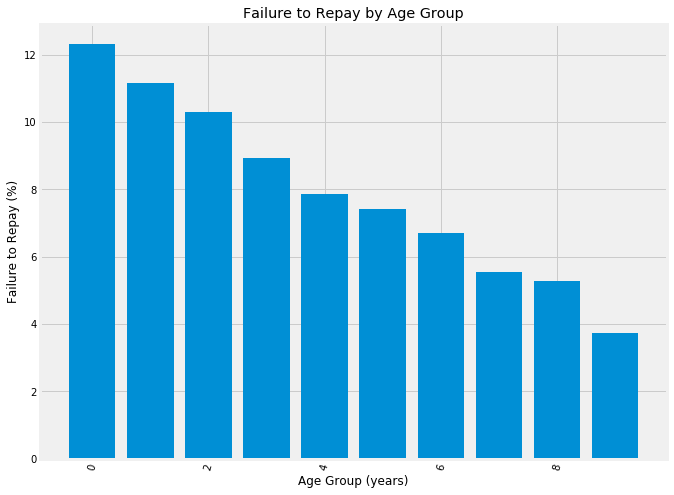

In [60]:
plt.figure(figsize = (10, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(list(age_groups.reset_index().index), 100 * age_groups['TARGET'].values)

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

So, as we can see here, There is a correlation between younger people and the failure to repay a loan.

### Let's explore the most negative correlated features

### EXT_SOURCE_1/2/3

This variables are normalized scores for external sourcers. It can be some score given by a model for each client or something like that.

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


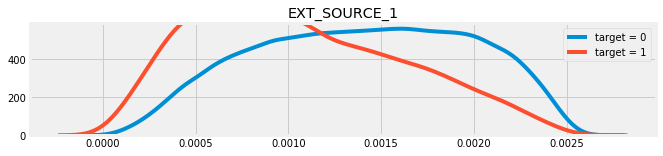

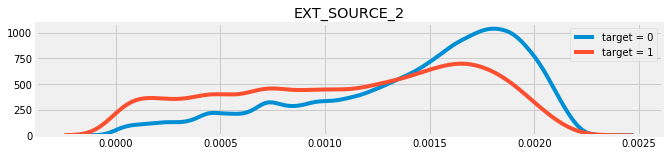

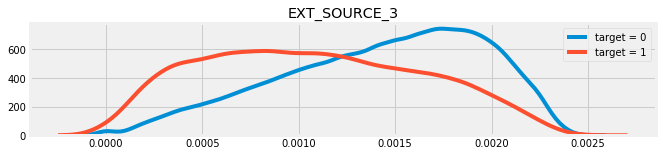

In [85]:
plt.figure(figsize=(10,7))
plt.subplot(311)

sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 0, 'EXT_SOURCE_1'] / 365, label = 'target = 0')
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 1, 'EXT_SOURCE_1'] / 365, label = 'target = 1')
plt.title('EXT_SOURCE_1')

plt.figure(figsize=(10,7))
plt.subplot(312)
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 0, 'EXT_SOURCE_2'] / 365, label = 'target = 0')
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 1, 'EXT_SOURCE_2'] / 365, label = 'target = 1')
plt.title('EXT_SOURCE_2')

plt.figure(figsize=(10,7))
plt.subplot(313)
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 0, 'EXT_SOURCE_3'] / 365, label = 'target = 0')
sns.kdeplot(at_numerical.loc[at_numerical['TARGET'] == 1, 'EXT_SOURCE_3'] / 365, label = 'target = 1')

plt.title('EXT_SOURCE_3')
plt.show()

Cool! The distributions are different for each target, meaning that there are some informations that we can get from this. For instance, on EXT_SOURCE_3, there are a lot of low scores for the ones who failed to repay the loan, and so on.

One more plot on this variables (along with days_birth), the correlation matrix between them and the target.

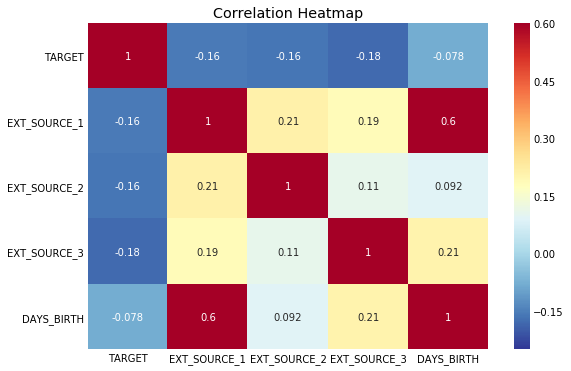

In [108]:
corr = at_numerical[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr()

plt.figure(figsize = (8, 6))

sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')
plt.show()

Now let's take a look on the other negative correlated variables.

### DAYS_EMPLOYED

In [102]:
at_numerical['DAYS_EMPLOYED'].value_counts().head()

365243    55374
200         156
224         152
199         151
230         151
Name: DAYS_EMPLOYED, dtype: int64

We can see that there is a value (365243) present in a lot of samples for the variable. This indicates a missing value treatment made by the sponsors of this competition. Let's treat this.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


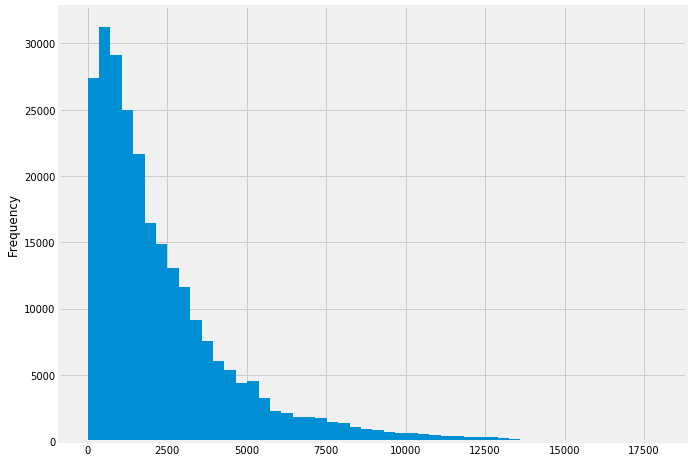

In [106]:
at_numerical['DAYS_EMPLOYED'] = abs(at_numerical['DAYS_EMPLOYED'])
days_employed = at_numerical[at_numerical['DAYS_EMPLOYED'] != 365243]

plt.figure(figsize = (10,8))
days_employed['DAYS_EMPLOYED'].plot.hist(bins = 50)
plt.show()

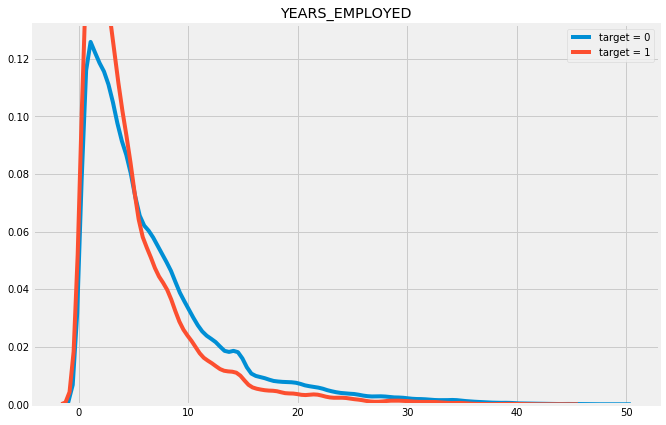

In [105]:
plt.figure(figsize=(10,7))
plt.subplot()

sns.kdeplot(days_employed.loc[days_employed['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target = 0')
sns.kdeplot(days_employed.loc[days_employed['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target = 1')

plt.title('YEARS_EMPLOYED')
plt.show()

This variable means how many days before the application the person started current employment, so there is a strong correlation between this information and the probability of a person to repay the loan. This will be a good feature for us.